In [1]:
import glob
import os 
import pandas as pd 
import numpy as np

import matplotlib.pylab as plt 
import plotly.express as ex 
import seaborn as sns 
import plotly.graph_objects as go

import missingno as miss 

from  ipywidgets import interact,interact_manual



In [2]:
# setting the path for joining multiple files
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
print(all_filenames)
dataframes = []  # a list to hold all the individual pandas DataFrames
for csvfile in all_filenames:
    df = pd.read_csv(csvfile)
    dataframes.append(df)
df=dataframes[0]
print(df.shape)
for i in range(1,11):
    df = pd.merge(df,dataframes[i],
                   on='Date', 
                   how='outer')

['AAPL.csv', 'AMZN.csv', 'GOOGL.csv', 'JP-MORGN.csv', 'MSFOT.csv', 'NTFLX.csv', 'NVDA.csv', 'TSLA.csv', 'VISA.csv', 'WL-MART.csv', 'ZAll_Combine_Stock_Histry.csv']
(1258, 8)


In [3]:
df.drop(['Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Volume_x', 'Company_x', 'Open_y', 'High_y', 'Low_y', 'Close_y',
       'Adj Close_y', 'Volume_y', 'Company_y', 'Open_x', 'High_x', 'Low_x',
       'Close_x', 'Adj Close_x', 'Volume_x', 'Company_x', 'Open_y', 'High_y',
       'Low_y', 'Close_y', 'Adj Close_y', 'Volume_y', 'Company_y', 'Open_x',
       'High_x', 'Low_x', 'Close_x', 'Adj Close_x', 'Volume_x', 'Company_x',
       'Open_y', 'High_y', 'Low_y', 'Close_y', 'Adj Close_y', 'Volume_y',
       'Company_y', 'Open_x', 'High_x', 'Low_x', 'Close_x', 'Adj Close_x',
       'Volume_x', 'Company_x', 'Open_y', 'High_y', 'Low_y', 'Close_y',
       'Adj Close_y', 'Volume_y', 'Company_y', 'Open_x', 'High_x', 'Low_x',
       'Close_x', 'Adj Close_x', 'Volume_x', 'Company_x', 'Open_y', 'High_y',
       'Low_y', 'Close_y', 'Adj Close_y', 'Volume_y', 'Company_y',],axis=1,inplace=True)

In [4]:
df.Date=pd.to_datetime(df.Date)

df.sort_values(by="Company",inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Company
0,2017-07-08,39.264999,39.730000,39.167500,39.702499,37.585022,87481200,AAPL
3010,2018-10-16,54.732498,55.747501,54.189999,55.537498,53.580002,116736000,AAPL
9380,2021-04-29,136.470001,137.070007,132.449997,133.479996,132.496674,151101000,AAPL
3000,2018-10-15,55.290001,55.457500,54.317501,54.340000,52.424709,123164000,AAPL
11640,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.572327,81532000,AAPL
...,...,...,...,...,...,...,...,...
7639,2020-08-18,136.169998,137.630005,133.169998,134.710007,131.132706,26744200,WLMART
7649,2020-08-19,134.210007,134.660004,131.850006,132.410004,128.893784,12718400,WLMART
7659,2020-08-20,131.210007,132.070007,130.050003,130.570007,127.102646,8936900,WLMART
7599,2020-12-08,130.470001,132.229996,129.080002,131.889999,127.861923,6364800,WLMART


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12580 entries, 0 to 12579
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12580 non-null  datetime64[ns]
 1   Open       12580 non-null  float64       
 2   High       12580 non-null  float64       
 3   Low        12580 non-null  float64       
 4   Close      12580 non-null  float64       
 5   Adj Close  12580 non-null  float64       
 6   Volume     12580 non-null  int64         
 7   Company    12580 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 884.5+ KB


<AxesSubplot:>

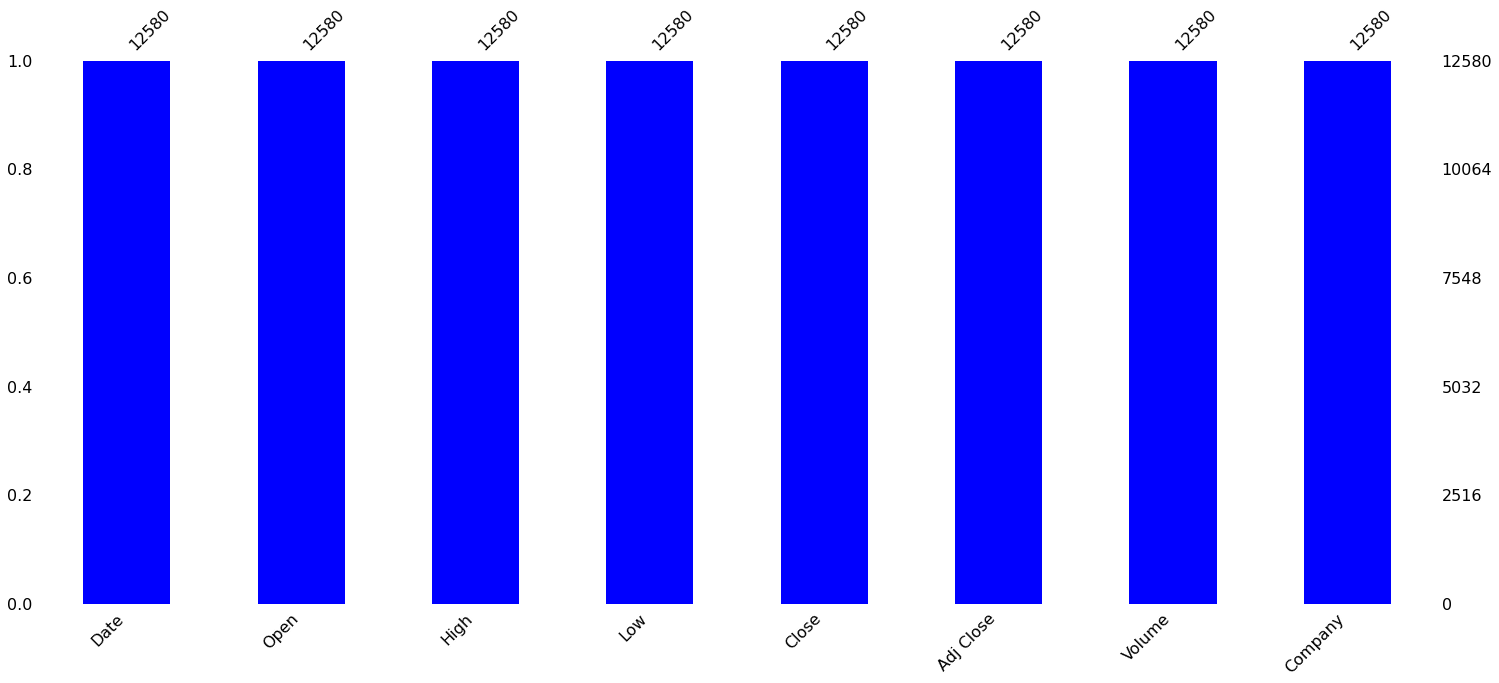

In [6]:
miss.bar(df,color="blue",sort='ascending')

In [7]:
def f(company =df.Company.unique()):
   
    data=df[df.Company==company]
    data.set_index('Date', inplace=True)
    data.plot(subplots=True, figsize=(10,12))
    plt.title('{} stock attributes'.format(company))
    plt.show()
interact_manual(f)

interactive(children=(Dropdown(description='company', options=('AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', '…

<function __main__.f(company=array(['AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', 'NTFLX', 'NVDA',
       'TSLA', 'VISA', 'WLMART'], dtype=object))>

In [10]:
def f(company =df.Company.unique(),date=['2017',"2018",'2019','2020','2021','2022']):
    data=df[df.Company==company]
    data.set_index('Date', inplace=True)
    data=data.loc[date]
    data.plot(subplots=True, figsize=(10,12))
    plt.title('{} stock attributes'.format(company))
    plt.show()
interact_manual(f)

interactive(children=(Dropdown(description='company', options=('AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', '…

<function __main__.f(company=array(['AAPL', 'AMZN', 'GOOGL', 'JP-MRGN', 'M-SOFT', 'NTFLX', 'NVDA',
       'TSLA', 'VISA', 'WLMART'], dtype=object), date=['2017', '2018', '2019', '2020', '2021', '2022'])>

comper last year for all 

In [83]:
df.groupby("Company").agg({'Low':['min','max','mean'],'High':['min','max','mean'],'Adj Close':['min','max','mean']})

Low                                 High               \
                min          max        mean         min          max   
Company                                                                 
AAPL      35.500000   179.119995   88.175914   36.430000   182.940002   
AMZN      46.587502   184.839493  113.665197   47.431499   188.654007   
GOOGL     45.169998   149.887497   80.849910   45.650002   152.100006   
JP-MRGN   76.910004   170.539993  119.769285   83.750000   172.960007   
M-SOFT    71.279999   342.200012  178.029666   72.190002   349.670013   
NTFLX    162.710007   686.090027  375.515016  168.669998   700.989990   
NVDA      31.115000   320.359985  105.818837   32.494999   346.470001   
TSLA      35.397999  1217.000000  336.320296   37.335999  1243.489990   
VISA      99.430000   248.220001  175.181383  100.300003   252.669998   
WLMART    77.500000   159.070007  116.854126   78.459999   160.770004   

                      Adj Close                           
               mean         min          max        mean  
Company                                                   
AAPL      90.228285   34.414234   181.511703   88.082744  
AMZN     116.471413   46.930000   186.570496  115.085707  
GOOGL     82.576140   45.333000   150.709000   81.733603  
JP-MRGN  122.190135   73.228569   168.013870  112.945602  
M-SOFT   181.815731   66.886467   341.606384  176.802718  
NTFLX    387.575159  165.949997   691.690002  381.706176  
NVDA     110.036357   31.554657   333.591766  107.744195  
TSLA     353.063473   35.793999  1229.910034  344.958510  
VISA     178.700890   96.336441   249.265625  174.595170  
WLMART   118.868680   71.414970   159.290985  113.643090

In [92]:
def f(ye=df['Date'].dt.year.sort_values().unique (),compere= ['Low','High','Adj Close']):
    include = df[df['Date'].dt.year == ye]
    da=include.groupby("Company").agg({'Low':['min','max','mean'],'High':['min','max','mean'],'Adj Close':['min','max','mean']})
    plt.figure(figsize=(15,15))   
    plt.subplot(3, 1, 1)
    sns.lineplot(x=da.index,y=da[compere]['min'])
    plt.subplot(3, 1, 2)
    sns.lineplot(x=da.index,y=da[compere]['max'])
    plt.subplot(3, 1, 3)
    sns.lineplot(x=da.index,y=da[compere]['mean'])
    plt.show()
    return 
interact_manual(f)

interactive(children=(Dropdown(description='ye', options=(2017, 2018, 2019, 2020, 2021, 2022), value=2017), Dr…

<function __main__.f(ye=array([2017, 2018, 2019, 2020, 2021, 2022], dtype=int64), compere=['Low', 'High', 'Adj Close'])>

In [69]:
  da=include.groupby("Company").agg({'Low':['min','max'],'High':['min','max'],'Adj Close':['min','max']})

KeyError: 'mean'

In [90]:
da.Low

,min,max
Company,,
AAPL,129.039993,179.119995
AMZN,101.260002,167.868500
GOOGL,102.208000,145.557495
JP-MRGN,106.059998,167.889999
M-SOFT,241.509995,329.779999
NTFLX,162.710007,590.559998
NVDA,140.550003,297.850006
TSLA,620.570007,1136.040039
VISA,185.910004,230.550003
